# Temperature Data Forecast

In [188]:
#import pandas and series
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import numpy
from pandas import TimeGrouper

df = pd.read_csv('daily-min-temperatures.csv',header=0, index_col=False)

In [189]:
from random import seed
from random import randrange

# zero rule algorithm for regression
def zero_rule_algorithm_regression(train, test):
    output_values = [row[-1] for row in train]
    prediction = list()
    for i in range(1,len(output_values)):
        prediction.append((output_values[i] + output_values[i-1] )/2)
        
    #prediction = sum(output_values) / float(len(output_values))
    #predicted = [prediction for i in range(len(test))]
    return prediction

seed(1)
train = [[10], [15], [12], [15], [18], [20]]
test = [[None], [None], [None], [None]]
predictions = zero_rule_algorithm_regression(train, test)
print(predictions)

[12.5, 13.5, 13.5, 16.5, 19.0]


      t   t+1
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8
Test MSE: 6.827


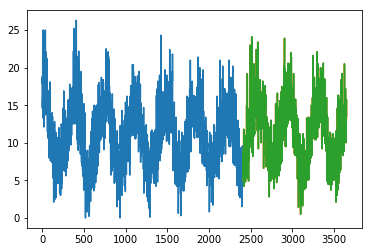

In [191]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('daily-min-temperatures.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
# Create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

In [192]:
df.set_index('Date')
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')



# Visualize Data

In [215]:
df.drop(['index'],axis=1, inplace=True)

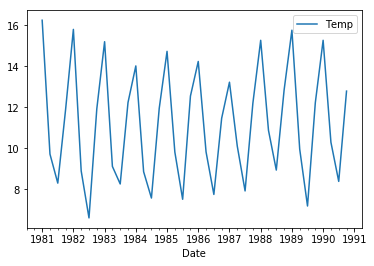

In [220]:
df.resample('Q').mean().plot()

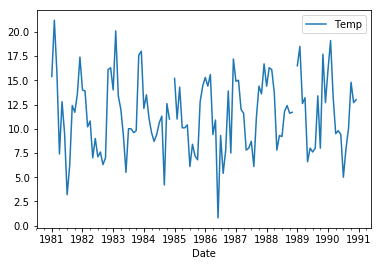

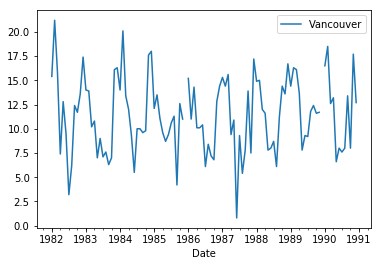

In [224]:
df.asfreq('M').plot(legend=True)
shifted = df.asfreq('M').shift(12).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.show()

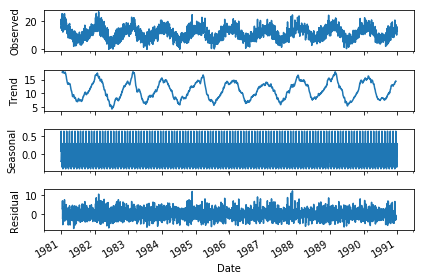

In [64]:
s = sm.tsa.seasonal_decompose(df.Temp, freq=30)
fig = s.plot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7F65221D0>]],
      dtype=object)

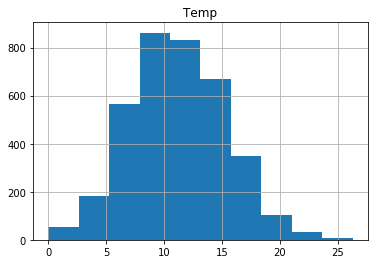

In [98]:
df.hist()

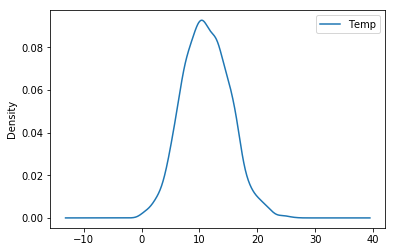

In [99]:
df.plot(kind='kde')
plt.show()

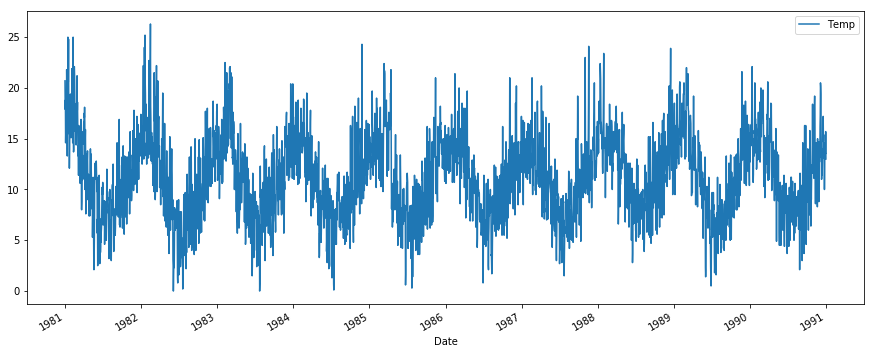

In [65]:
df.plot(figsize=(15,6))
plt.show()

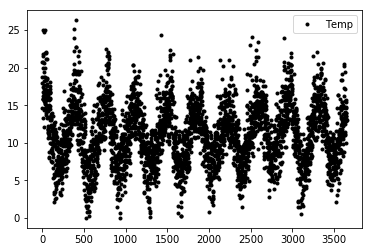

In [159]:
series = pd.read_csv('daily-min-temperatures.csv', header=0)
series.plot(style='k.')
pyplot.show()

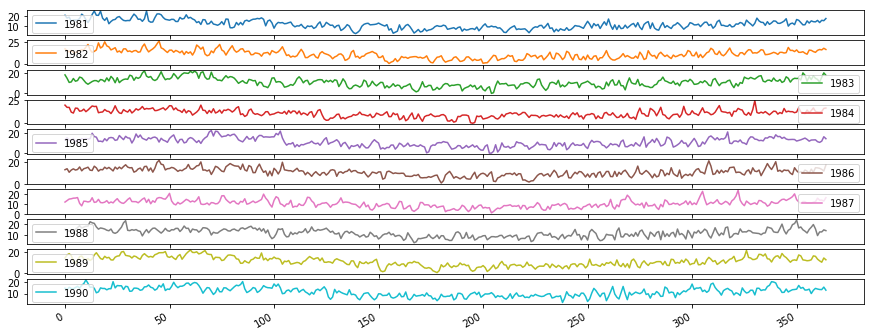

In [142]:

groups = series.groupby(pd.Grouper(freq='Y'))


years = DataFrame()

for name, group in groups:
    years[name.year] = group.values
    
years.plot(subplots=True, legend=True, figsize=(15,6))
pyplot.show()


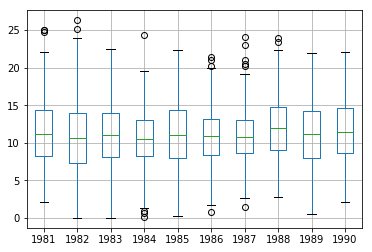

In [143]:
years.boxplot()
plt.show()

In [155]:
series1 = series['1990']
groups = series1.groupby(pd.Grouper(freq='M'))


months = DataFrame()

for x in groups:
    print(name.month)
    #print(group.values)
    print(x[1].values)


'''    
months.plot(subplots=True, legend=True, figsize=(15,6))
pyplot.show()
'''

1
[14.8 13.3 15.6 14.5 14.3 15.3 16.4 14.8 17.4 18.8 22.1 19.  15.5 15.8
 14.7 10.7 11.5 15.  14.5 14.5 13.3 14.3 14.3 20.5 15.  17.1 16.9 16.9
 13.6 16.4 16.1]
1
[12.  12.2 14.8 14.8 14.4 12.9 13.4 15.9 16.1 17.6 15.6 15.  13.  14.1
 17.3 15.7 18.6 12.7 14.  13.7 16.3 20.  17.  15.2 16.5 16.5 17.3 19.1]
1
[19.3 17.3 19.  19.8 19.3 17.2 14.2 10.3 13.  15.3 15.  12.1  9.2 11.
 15.  11.6 11.6 15.1 15.  13.6 12.5 14.3 16.  17.4 16.9 18.  20.6 14.2
 10.9 11.9 13.3]
1
[15.3 14.7 11.  12.2 14.2 17.  15.8 15.2 15.1 14.7 18.5 16.4 18.4 15.1
  9.9 10.2 12.6 13.2 11.5 13.8 14.5 14.7 11.2 12.7 13.7 11.5 10.4  8.9
 11.1  9.5]
1
[13.  13.9 12.6 14.3 16.  13.3  7.   4.9  6.9 13.7 10.6 12.3 11.1 10.2
  9.5  8.9 13.4  9.1  9.4  8.7  5.8  4.5  7.2 10.  10.5 10.7  8.2  6.1
  4.5  6.1  9.8]
1
[ 9.7  8.2  8.4  8.5 10.4  6.8  6.   6.6  7.8 10.3  7.2  7.4 11.4  5.4
  4.4  6.4  9.3  7.7  8.1  8.3  9.1  7.7 10.6  8.2  7.9  5.2  5.9  3.7
  5.6  9.4]
1
[ 7.4  7.3  7.7  7.7  9.3  4.4  5.7 10.2 10.2  9.3  5.4  5.

'    \nmonths.plot(subplots=True, legend=True, figsize=(15,6))\npyplot.show()\n'

# Split the Dataset

In [66]:
# split the dataset
from pandas import Series
import pandas
series = Series.from_csv('daily-min-temperatures.csv', header=0)

split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('Temperature-dataset.csv')
validation.to_csv('Temperature-validation.csv')

Dataset 3643, Validation 7


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


# Developing the forecasting model

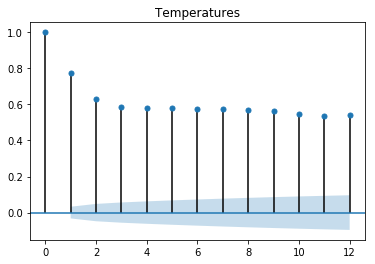

In [226]:
sm.graphics.tsa.plot_acf(df,lags=12,title="Temperatures")
plt.show()

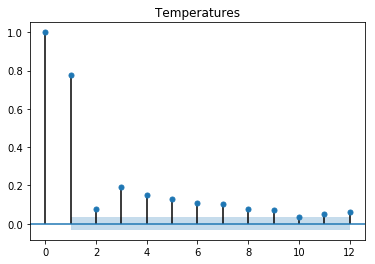

In [227]:
sm.graphics.tsa.plot_pacf(df,lags=12,title="Temperatures")
plt.show()

In [67]:


# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# load dataset
series = Series.from_csv('Temperature-dataset.csv', header=None)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Forecast: 14.861662


In [70]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
